<a href="https://colab.research.google.com/github/RuHsu015/myjavascript_test/blob/main/%E3%80%8Cembedding2_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The IMDB dataset

We will work with the IMDB dataset, which contains 25,000 movie reviews from [IMDB](https://www.imdb.com/). Each review is labeled as positive or negative from the rating provided by users together with their reviews. 

The dataset is distributed with keras. Before loading it in memory, we initialize our tools: 

## Load data & preprocess

In [ ]:
# get reproducible results
from numpy.random import seed
seed(0xdeadbeef)
import tensorflow as tf
tf.random.set_seed(0xdeadbeef)

In [ ]:
from tensorflow import keras
imdb = keras.datasets.imdb
num_words = 20000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=1, num_words=num_words)

In [ ]:
valid_data = test_data[:12500]
test_data = test_data[12500:]

valid_labels = test_labels[:12500]
test_labels = test_labels[12500:]

In [ ]:
max=0
for i in range(len(train_data)):
  if len(train_data[i]) > max:
    max = len(train_data[i])

In [ ]:
max

2494

In [ ]:
import pandas as pd
comment = pd.DataFrame({"train_data":train_data, "train_labels":train_labels})
comment.head()

,train_data,train_labels
0,"[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36...",0
1,"[1, 103, 450, 576, 73, 2896, 8, 4, 213, 7, 897...",1
2,"[1, 13, 131, 92, 124, 138, 13, 918, 546, 8, 87...",0
3,"[1, 2, 117, 799, 5, 13, 26, 532, 10469, 189, 2...",0
4,"[1, 13, 28, 1276, 110, 111, 910, 102, 11, 61, ...",1


In [ ]:
comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    25000 non-null  object
 1   train_labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
comment.train_labels.value_counts()

0    12500
1    12500
Name: train_labels, dtype: int64

In [ ]:
comment_test = pd.DataFrame({"test_data":test_data, "test_labels":test_labels})
comment_test[:100]

,test_data,test_labels
0,"[1, 13, 219, 14, 33, 61, 9527, 1724, 438, 57, ...",0
1,"[1, 13, 1053, 4480, 234, 7, 61, 113, 23, 14, 2...",0
2,"[1, 14, 9, 6, 55, 364, 352, 22, 270, 11, 31, 1...",0
3,"[1, 13, 1610, 6, 1039, 7, 14, 31, 39, 6348, 19...",0
4,"[1, 35, 6587, 310, 7, 6, 756, 63, 47, 77, 224,...",0
...,...,...
95,"[1, 6, 431, 1184, 1738, 13214, 5, 1514, 5257, ...",1
96,"[1, 61, 1246, 69, 14, 20, 17, 35, 13110, 4777,...",1
97,"[1, 6, 55, 5944, 1987, 708, 2, 9, 6, 3005, 463...",1
98,"[1, 38, 73, 93, 57, 1683, 595, 47, 259, 334, 7...",1


In [ ]:
comment_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   test_data    25000 non-null  object
 1   test_labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
comment_test.test_labels.value_counts()

0    12500
1    12500
Name: test_labels, dtype: int64

In [ ]:
len(train_data), len(test_data), len(valid_data)

(25000, 12500, 12500)

In [ ]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [ ]:
train_data[0][:10], train_labels[0]

([1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104], 0)

At the moment, `imdb.load_data` triggers deprecation warnings that can be ignored.

The first review looks like this:

In [ ]:
print(train_data[0])
print('label:', train_labels[0])

[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 837, 1396, 27, 369, 459, 44, 68, 4731, 5, 181, 8, 607, 4, 6791, 3

We see that the text of the review has been encoded as a sequence of integers. Please refer to [part 2](https://thedatafrog.com/text-preprocessing-machine-learning-yelp/) of this tutorial series if you want to understand how such an encoding can be done in practice. 

Each word in the text is represented as an integer. A dictionary called the **vocabulary** links each word to a unique integer. In the example above, we see that the integer 4 is repeated many times. This integer corresponds to a very frequent word. And actually, the more frequent a word, the lower the integer.    

To decode the review, we need to make use of the vocabulary:

In [ ]:
# A dictionary mapping words to an integer index
vocabulary = imdb.get_word_index()

# The first indices are reserved
vocabulary = {k:(v+3) for k,v in vocabulary.items()} 
vocabulary["<pad>"] = 0
# See how integer 1 appears first in the review above. 
vocabulary["<sos>"] = 1
vocabulary["<unk>"] = 2  # unknown
vocabulary["<unused>"] = 3

# reversing the vocabulary. 
# in the index, the key is an integer, 
# and the value is the corresponding word.
index = dict([(value, key) for (key, value) in vocabulary.items()])

def decode_review(text):
    '''converts encoded text to human readable form.
    each integer in the text is looked up in the index, and 
    replaced by the corresponding word.
    '''
    return ' '.join([index.get(i, '?') for i in text])


In [ ]:
decode_review(train_data[0])

"<sos> i have copy of this on vhs i think they the television networks should play this every year for the next twenty years so that we don't forget what was and that we remember not to do the same mistakes again like putting some people in the director's chair where they don't belong this movie <unk> is like a <unk> musical for those who can't sing or act this movie is as much fun as trying to teach the <unk> to drive a city bus br br john hood <unk> has just got out of prison and he's headed back to the old neighborhood in serving time for an all to nice crime of necessity of course john heads back onto the old street and is greeted by kids dogs old ladies and his peer <unk> as they dance and sing all along the way br br i would recommend this if i was sentimental or if in truth someone was smoking <unk> pot <unk> by a doctor for <unk> either way this is a poorly directed scripted acted and even produced i never thought i'd sat that satire of ghetto life with the <unk> although i thi

We see that integer 4 indeed corresponds to a very frequent word, "the". Now what do we do with this dataset? We can see two issues if we are to use it as input to a neural network:

* The reviews have a variable number of words, while the network has a fixed number of neurons.
* The words are completely independent. For example, "brilliant" and "awesome" correspond to two different integers, and the neural network does not know a priori that these two adjectives have similar meaning. 

Let's deal with the first issue. To get a fixed length input, we can simply truncate the reviews to a fixed number of words, say 256. For reviews that have more than 256 words, we will keep only the first 256 words. For shorter reviews, we will fill the unused word slots with zeros. With keras, this is easy to do:

In [ ]:
# fixed every text length
fixed_length=1000
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                             value=vocabulary["<pad>"],
                             padding='post',
                             maxlen=fixed_length)

valid_data = keras.preprocessing.sequence.pad_sequences(valid_data,
                            value=vocabulary["<pad>"],
                            padding='post',
                            maxlen=fixed_length)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                            value=vocabulary["<pad>"],
                            padding='post',
                            maxlen=fixed_length)

In [ ]:
train_data[1]

array([    1,   103,   450,   576,    73,  2896,     8,     4,   213,
           7,   897,    13,    16,   576,  3521,    19,     4,    22,
           4,    22,    16,   465,   728,     4,  2563,     4,  1460,
           4,  3237,     5,     6,    55,   576,  1078,  2734,    10,
          10,    13,    69,  2721,   873,     8,    67,   111,   318,
         302,     5,    40,     6, 13892,     2,    12,  4280,    72,
         245,    19,     4,  4211,     5,     4,     2,     7,    12,
        1620,    13,   244,   174,  2654,   245,    19,   129,  7102,
          19,     4,   979,     7,     4,    65,     5,   129,   459,
           7,     4,   318,   302,    25,    80,   140,     6,   196,
          96,    61,   464,    13,    80,   407,    30,     4,  2217,
           7,   129,   337,  1333,    10,    10,  2127,     2,     4,
         118,   284,  1344,    16,     4,   612,    31,  1099,    25,
          93,  1792,  7606,   168,    40,     6,   506,  1079,     8,
           2,    10,

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['binary_accuracy']
  val_accuracy = history.history['val_binary_accuracy']

  epochs = range(len(history.history['loss']))

  # 設置統一刻度間距及範圍
  # x_major_locator = MultipleLocator(1)
  # y_major_locator = MultipleLocator(0.05)
  
  # ax=plt.gca()
  # ax.xaxis.set_major_locator(x_major_locator)
  # ax.yaxis.set_major_locator(y_major_locator)
  # plt.xlim(0, 10)
  pd.DataFrame(history.history).plot(figsize=(10,7));

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();['val_loss']

  

The first issue is solved: Our reviews are now of fixed length. The second issue is addressed below. 

## Embedding: Why is it Needed? 

In this section, we will see why a standard dense neural network is by essence unable to deal with this dataset.

As we have seen in my post about [the 1-neuron network](https://thedatafrog.com/logistic-regression/), neural networks are simply a function of their inputs. In the 1-neuron network (or logistic regression), this function is 

$$ f( \{ x_i \} ) = \sigma (z)$$

where $\sigma$ is the sigmoid function and where the weighted input $z$ of the only neuron is computed as 

$$z= b+ \sum_{i} w_i x_i$$ 

In this expression, the sum runs over all input variables $x_i$, and $b$ is the bias of the neuron. When the network is trained, the network parameters (the biases and weights) are tuned for best performance. 

Now what would happen if we tried to classify our reviews as either positive or negative with a logistic regression?

The input variables would be the 256 integers in the review array. Let us assume a positive weight $w_i$ for variable i. Since the sigmoid function increases monotonically, when variable $i$ increases, the output of the network, which is the probability for the review to be positive, increases.

But there is no reason for variable $i$ to be correlated in any way to the probability for the review to be positive! 

For example, variable $i$ could be 27 (corresponding to the word "bad"), 118 ("good"), or 1562 ("awful"). The review does not look more positive when the integer gets bigger. 
In other words, the actual value of the integer code for a given word does not carry any information by itself on the quality of the review. This value is arbitrary, and would be different with another encoding algorithm. 

Clearly, a logistic regression would not be of any use in classifying our reviews.

Maybe the logistic regression is too simple, and a more complex dense network would help? 

Actually, that's not the case. Indeed, in a dense network with hidden layers, each of the neurons in the first hidden layer behaves as the single neuron of the logistic regression. So more complex dense networks suffer from the same problems as the simple logistic regression. 


## Simple sentiment analysis with embedding

Embedding is a way to extract the meaning of a word. In the embedding process, each word (or more precisely, each integer corresponding to a word) is translated to a vector in N-dimensional space. 

That does sound complicated! but it's not.  

To understand better, we're going to perform the embedding in two dimensions only. Each word is then going to be converted to a vector with two coordinates $(x,y)$, and these coordinates can be represented as a point in a plane. 

As you will see below, the text of a review will appear as an ensemble of points, and the points with similar meaning will be grouped together. Looking at the distribution of the points in 2D, the neural network will be able to predict whether the review is positive or negative. 

In practice, here is how to do that in keras. If anything is unclear in the steps below, you might want to look at my post about [deep learning for image recognition with keras](https://thedatafrog.com/deep-learning-keras/).

## Model 1

In [ ]:

model = keras.Sequential()

# the first layer is the embedding layer. 
# we indicate the number of possible words, 
# the dimension of the embedding space, 
# and the maximum size of the text. 
model.add(keras.layers.Embedding(len(vocabulary), 30, input_length=256))

# the output of the embedding is multidimensional, 
# with shape (256, 30)
# for each word, we obtain 30 values, 
# the x and y coordinates
# we flatten this output to be able to 
# use it in a dense layer
# model.add(keras.layers.Flatten())
model.add(keras.layers.SimpleRNN(10))

# dropout regularization
# model.add(keras.layers.Dropout(rate=0.5))

# small dense layer. It's role is to analyze 
# the distribution of points from embedding
model.add(keras.layers.Dense(5))

# final neuron, with sigmoid activation 
# for binary classification
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 256, 30)           2657640   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 10)                410       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2,658,111
Trainable params: 2,658,111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = keras.Sequential()
# model.add(keras.layers.Embedding(len(vocabulary), 30, input_length=256))
# model.add(keras.layers.SimpleRNN(10))
# model.add(keras.layers.Dropout(rate=0.5))
# model.add(keras.layers.Dense(5))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

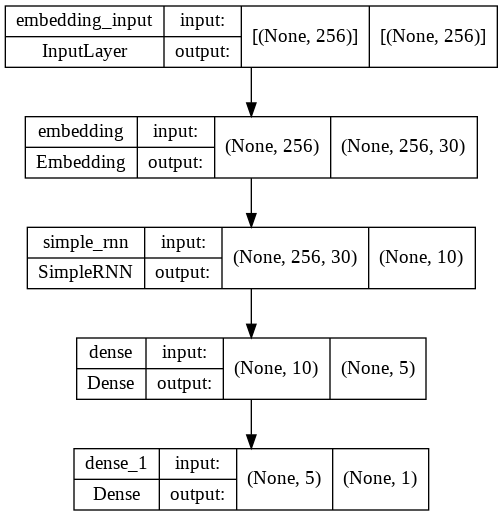

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

As you can see, it is enough to add an embedding layer to our neural network to perform embedding. And it could be a bit surprising to see that we only have to provide three arguments to construct the embedding layer: the length of the vocabulary, the number of dimensions in the embedding space, and the number of words in the input text. 

In the summary printout just above, we see that the embedding layer represents 177176 parameters. At first, these parameters are random, and the embedding is just meaningless. During the training, these parameters are tuned and the network becomes more and more capable to extract the meaning of the words.

Now that the model is ready, we compile it and we train it. There is no need for a GPU here, as the training will be quite fast even on a CPU.

In [ ]:
model.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy'])


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model.fit(train_data,
           train_labels,
           epochs=20,
           batch_size=100,
           validation_data=(valid_data, valid_labels),
           callbacks = [callback]
           )

Epoch 1/20
250/250 [==============================] - 45s 177ms/step - loss: 0.6854 - accuracy: 0.5309 - val_loss: 0.6664 - val_accuracy: 0.5446
Epoch 2/20
250/250 [==============================] - 45s 180ms/step - loss: 0.6212 - accuracy: 0.6500 - val_loss: 0.6626 - val_accuracy: 0.6118
Epoch 3/20
250/250 [==============================] - 45s 178ms/step - loss: 0.5386 - accuracy: 0.7303 - val_loss: 0.5879 - val_accuracy: 0.7074
Epoch 4/20
250/250 [==============================] - 45s 181ms/step - loss: 0.4790 - accuracy: 0.7745 - val_loss: 0.6020 - val_accuracy: 0.7254
Epoch 5/20
250/250 [==============================] - 45s 178ms/step - loss: 0.5011 - accuracy: 0.7518 - val_loss: 0.7525 - val_accuracy: 0.5302
Epoch 6/20
250/250 [==============================] - 45s 178ms/step - loss: 0.3992 - accuracy: 0.8138 - val_loss: 0.8273 - val_accuracy: 0.5317


In [ ]:
model_pred = model.predict(test_data)
model_pred

array([[0.72723854],
       [0.5536943 ],
       [0.22263844],
       ...,
       [0.58513683],
       [0.5652922 ],
       [0.4459743 ]], dtype=float32)

In [ ]:
model_pred = tf.squeeze(model_pred)

In [ ]:
model_pred.shape, test_labels.shape

(TensorShape([12500]), (12500,))

In [ ]:
model_pred

<tf.Tensor: shape=(12500,), dtype=float32, numpy=
array([0.70385265, 0.4626025 , 0.46122828, ..., 0.45361766, 0.39942208,
       0.5570969 ], dtype=float32)>

In [ ]:
test_labels

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
loss, acc = model.evaluate(test_data, test_labels)
loss, acc

391/391 [==============================] - 8s 20ms/step - loss: 0.8339 - accuracy: 0.5264


(0.8338977098464966, 0.5264000296592712)

We can now look at the evolution of the training and testing accuracies as a function of time, with this small function: 

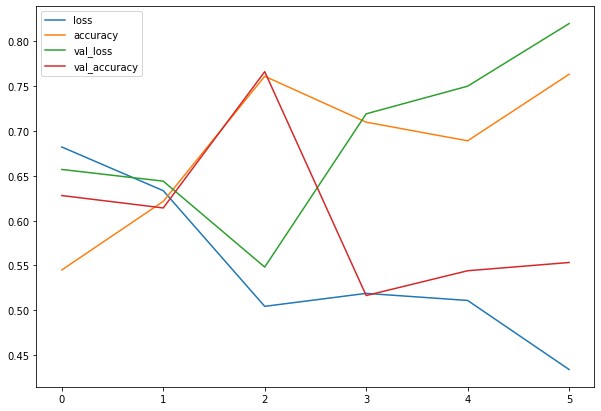

In [ ]:
# evaluate model
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7));

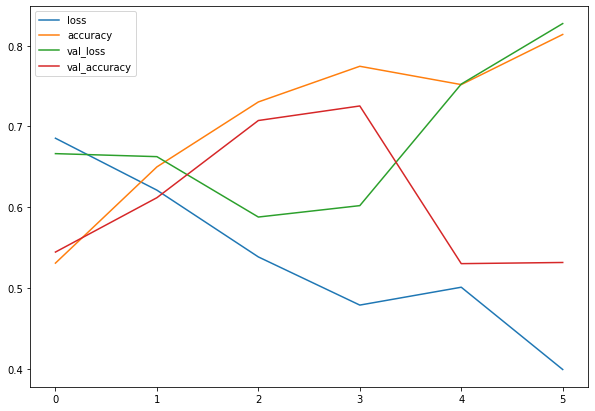

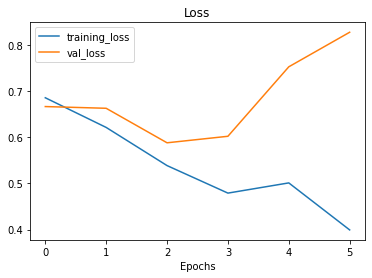

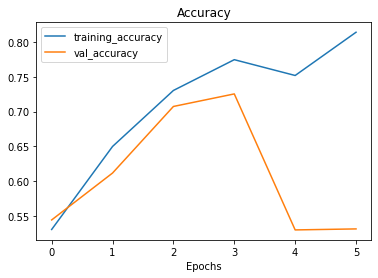

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history)

In [ ]:
# import matplotlib.pyplot as plt
# def plot_accuracy(history, miny=None):
#   acc = history.history['accuracy']
#   val_acc = history.history['val_accuracy']
#   epochs = range(len(acc))
#   plt.plot(epochs, acc)
#   plt.plot(epochs, val_acc)
#   if miny:
#     plt.ylim(miny, 1.0)
#   plt.title('accuracy') 
#   plt.xlabel('epoch')
#   plt.figure()

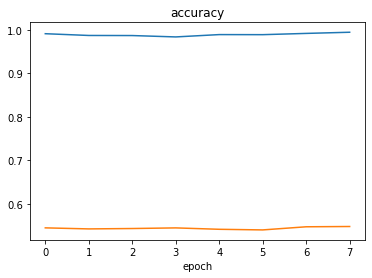

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot_accuracy(history)

## Model_1

In [ ]:
# 減少 embedding 維度到 20, 且增加一層 rnn layer, 第一層 rnn 讓他 return sequence, 倒數第二層dense 改relu
model_1 = keras.Sequential()
model_1.add(keras.layers.Embedding(len(vocabulary), 20, input_length=256))
model_1.add(keras.layers.SimpleRNN(10, return_sequences=True))
model_1.add(keras.layers.SimpleRNN(10))
# model_1.add(keras.layers.Dropout(rate=0.5))
model_1.add(keras.layers.Dense(5, activation="relu"))
model_1.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_1.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history_1 = model.fit(train_data,
           train_labels,
           epochs=20,
           batch_size=100,
           validation_data=(valid_data, valid_labels),
           callbacks = [callback])

Epoch 1/20
250/250 [==============================] - 45s 179ms/step - loss: 0.3185 - accuracy: 0.8633 - val_loss: 0.9717 - val_accuracy: 0.5362
Epoch 2/20
250/250 [==============================] - 46s 184ms/step - loss: 0.2395 - accuracy: 0.9061 - val_loss: 1.0806 - val_accuracy: 0.5396
Epoch 3/20
250/250 [==============================] - 45s 181ms/step - loss: 0.1844 - accuracy: 0.9304 - val_loss: 1.1076 - val_accuracy: 0.5932
Epoch 4/20
250/250 [==============================] - 45s 181ms/step - loss: 0.1403 - accuracy: 0.9497 - val_loss: 1.2182 - val_accuracy: 0.5859


In [ ]:
loss_1, acc_1 = model_1.evaluate(test_data, test_labels)
loss_1, acc_1

391/391 [==============================] - 15s 37ms/step - loss: 0.6941 - accuracy: 0.5030


(0.6940891146659851, 0.5029600262641907)

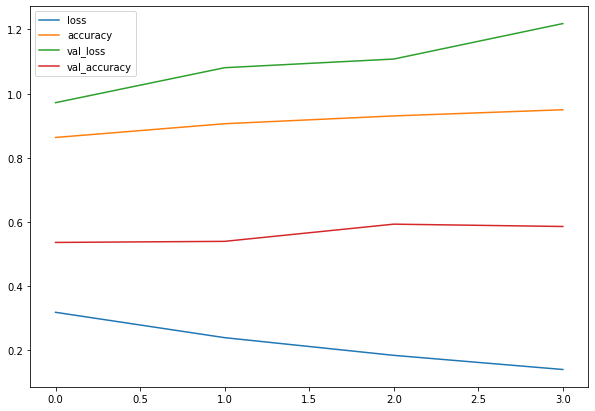

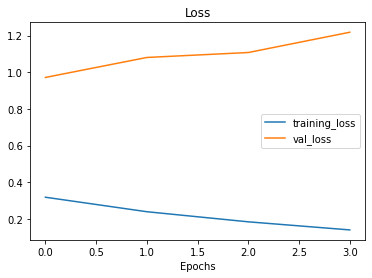

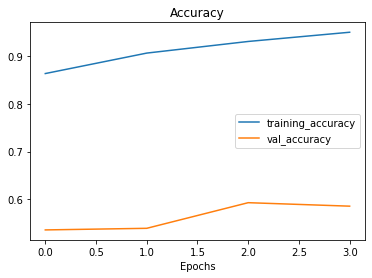

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_1)

## Model_2

In [ ]:
# model 過於複雜，減少一層dense
model_2 = keras.Sequential()
model_2.add(keras.layers.Embedding(len(vocabulary), 20, input_length=256))
model_2.add(keras.layers.SimpleRNN(10, return_sequences=True))
model_2.add(keras.layers.SimpleRNN(10))
# model_1.add(keras.layers.Dropout(rate=0.5))
# model_1.add(keras.layers.Dense(5, activation="relu"))
model_2.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_2.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history_2 = model.fit(train_data,
           train_labels,
           epochs=20,
           batch_size=100,
           validation_data=(valid_data, valid_labels),
           callbacks = [callback])

Epoch 1/20
250/250 [==============================] - 56s 224ms/step - loss: 0.1045 - accuracy: 0.9634 - val_loss: 1.3698 - val_accuracy: 0.5804
Epoch 2/20
250/250 [==============================] - 49s 196ms/step - loss: 0.1445 - accuracy: 0.9474 - val_loss: 1.5667 - val_accuracy: 0.5207
Epoch 3/20
250/250 [==============================] - 45s 182ms/step - loss: 0.0951 - accuracy: 0.9684 - val_loss: 1.7650 - val_accuracy: 0.5255
Epoch 4/20
250/250 [==============================] - 46s 183ms/step - loss: 0.0708 - accuracy: 0.9776 - val_loss: 1.9752 - val_accuracy: 0.5231


In [ ]:
loss_2, acc_2 = model_2.evaluate(test_data, test_labels)
loss_2, acc_2

391/391 [==============================] - 15s 36ms/step - loss: 0.7161 - accuracy: 0.4986


(0.7160584926605225, 0.49856001138687134)

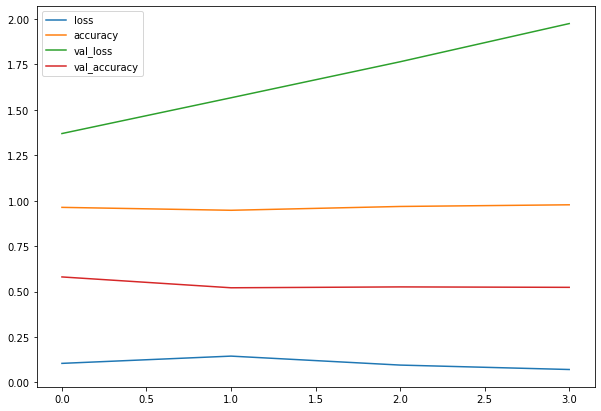

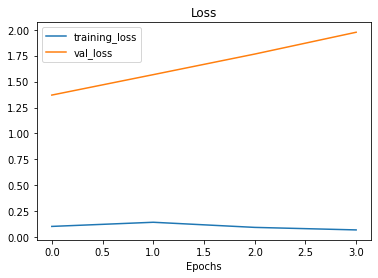

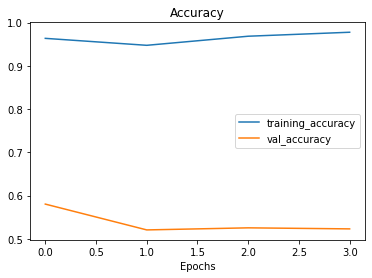

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_2)

## Model_2

In [ ]:
# 
model_2 = keras.Sequential()
model_2.add(keras.layers.Embedding(len(vocabulary), 20, input_length=256))
model_2.add(keras.layers.SimpleRNN(10))
# model_2.add(keras.layers.SimpleRNN(10))
# model_1.add(keras.layers.Dropout(rate=0.5))
model_2.add(keras.layers.Dense(5, activation="relu"))
model_2.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.optimizers.SGD(learning_rate=0.001),
        metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history_2 = model_2.fit(train_data,
           train_labels,
           epochs=20,
           batch_size=100,
           validation_data=(valid_data, valid_labels),
           callbacks = [callback]
           )

Epoch 1/20
250/250 [==============================] - 16s 61ms/step - loss: 0.6946 - accuracy: 0.5038 - val_loss: 0.6943 - val_accuracy: 0.4902
Epoch 2/20
250/250 [==============================] - 15s 60ms/step - loss: 0.6941 - accuracy: 0.4980 - val_loss: 0.6939 - val_accuracy: 0.4882
Epoch 3/20
250/250 [==============================] - 16s 65ms/step - loss: 0.6940 - accuracy: 0.4952 - val_loss: 0.6940 - val_accuracy: 0.4896
Epoch 4/20
250/250 [==============================] - 15s 61ms/step - loss: 0.6938 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.5084
Epoch 5/20
250/250 [==============================] - 15s 60ms/step - loss: 0.6937 - accuracy: 0.5023 - val_loss: 0.6937 - val_accuracy: 0.4924
Epoch 6/20
250/250 [==============================] - 15s 61ms/step - loss: 0.6936 - accuracy: 0.4995 - val_loss: 0.6936 - val_accuracy: 0.4938
Epoch 7/20
250/250 [==============================] - 15s 60ms/step - loss: 0.6935 - accuracy: 0.5037 - val_loss: 0.6933 - val_accuracy:

In [ ]:
loss_2, acc_2 = model_2.evaluate(test_data, test_labels)
loss_2, acc_2

391/391 [==============================] - 7s 17ms/step - loss: 0.6939 - accuracy: 0.4966


(0.6939396858215332, 0.4965600073337555)

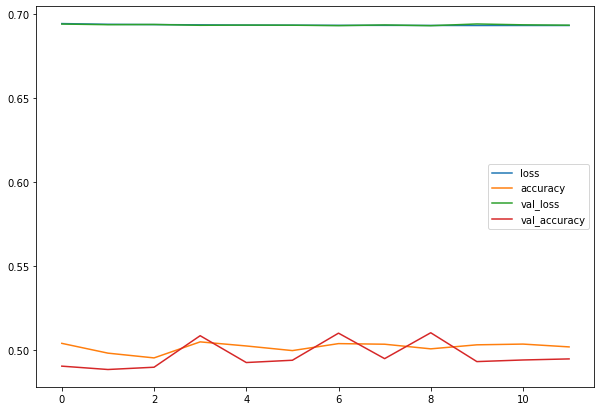

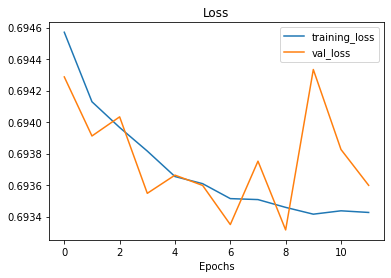

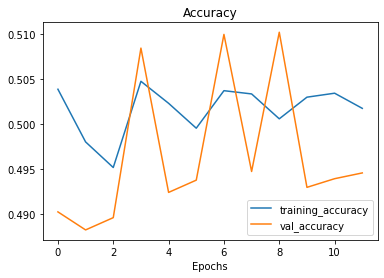

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_2)

## Model_3

In [ ]:
# add recurrent dropout
model_3 = keras.Sequential()
model_3.add(keras.layers.Embedding(len(vocabulary), 20, input_length=256))
model_3.add(keras.layers.SimpleRNN(10, recurrent_dropout=0.5))

# model_2.add(keras.layers.SimpleRNN(10))
# model_1.add(keras.layers.Dropout(rate=0.5))
model_3.add(keras.layers.Dense(5, activation="relu"))
model_3.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.optimizers.SGD(learning_rate=0.001),
        metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history_3 = model_3.fit(train_data,
           train_labels,
           epochs=20,
           batch_size=100,
           validation_data=(valid_data, valid_labels),
           callbacks = [callback]
           )

Epoch 1/20
250/250 [==============================] - 45s 164ms/step - loss: 0.7411 - accuracy: 0.5036 - val_loss: 0.7015 - val_accuracy: 0.4934
Epoch 2/20
250/250 [==============================] - 17s 67ms/step - loss: 0.7331 - accuracy: 0.5036 - val_loss: 0.7053 - val_accuracy: 0.4934
Epoch 3/20
250/250 [==============================] - 16s 66ms/step - loss: 0.7322 - accuracy: 0.5013 - val_loss: 0.7092 - val_accuracy: 0.4934
Epoch 4/20
250/250 [==============================] - 16s 65ms/step - loss: 0.7287 - accuracy: 0.4988 - val_loss: 0.7113 - val_accuracy: 0.4934


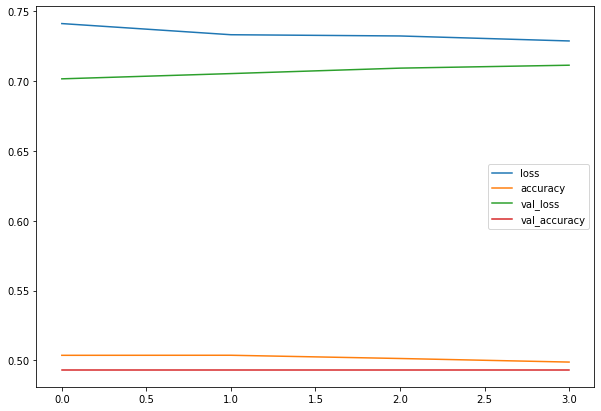

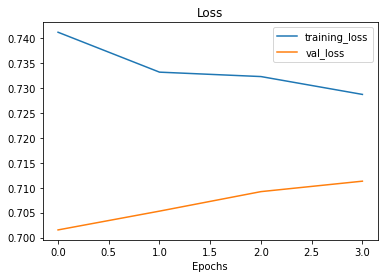

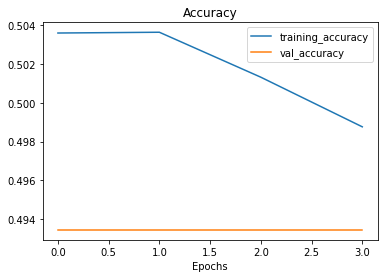

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_3)

## Model_4

In [ ]:
# try layernorm
model_4=keras.Sequential([
  keras.layers.Embedding(len(vocabulary), 20, input_length=256),
  keras.layers.SimpleRNN(10, recurrent_dropout=0.5),
  keras.layers.LayerNormalization(),
  keras.layers.Dense(5, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
        optimizer=tf.optimizers.SGD(learning_rate=0.01),
        metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [ ]:
history_4=model_4.fit(train_data, train_labels, epochs=20, validation_data=(valid_data, valid_labels), callbacks=[callback])

Epoch 1/20
782/782 [==============================] - 61s 78ms/step - loss: 0.7084 - accuracy: 0.5020 - val_loss: 0.6960 - val_accuracy: 0.4934
Epoch 2/20
782/782 [==============================] - 61s 78ms/step - loss: 0.6963 - accuracy: 0.5021 - val_loss: 0.6954 - val_accuracy: 0.4934
Epoch 3/20
782/782 [==============================] - 61s 79ms/step - loss: 0.6949 - accuracy: 0.5003 - val_loss: 0.6941 - val_accuracy: 0.4934
Epoch 4/20
782/782 [==============================] - 60s 77ms/step - loss: 0.6943 - accuracy: 0.5017 - val_loss: 0.6939 - val_accuracy: 0.4934
Epoch 5/20
782/782 [==============================] - 60s 76ms/step - loss: 0.6939 - accuracy: 0.5003 - val_loss: 0.6938 - val_accuracy: 0.4934
Epoch 6/20
782/782 [==============================] - 60s 76ms/step - loss: 0.6942 - accuracy: 0.4983 - val_loss: 0.6939 - val_accuracy: 0.4934
Epoch 7/20
782/782 [==============================] - 60s 77ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy:

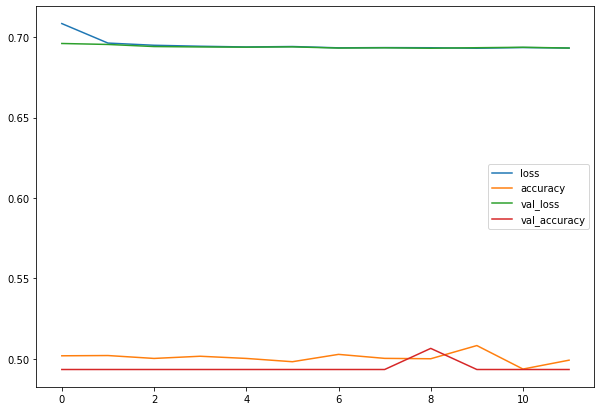

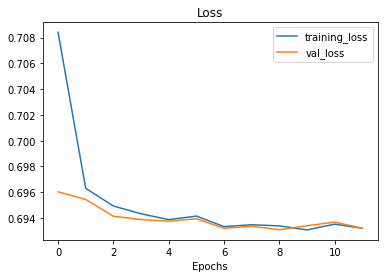

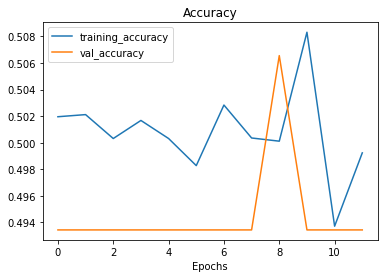

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_4)

## Model_5

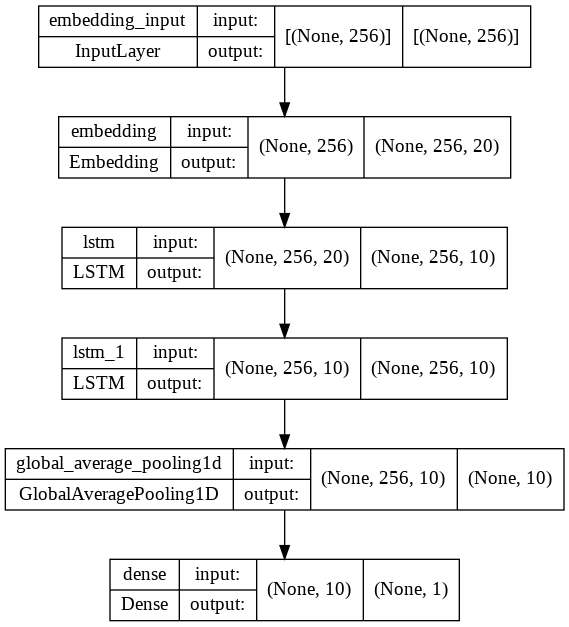

In [ ]:
# change to lstm layer
from tensorflow.keras.utils import plot_model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Embedding(len(vocabulary), 20, input_length=256),
  tf.keras.layers.LSTM(10, dropout=0.5, return_sequences=True),
  tf.keras.layers.LSTM(10, dropout=0.5, return_sequences=True),
  
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
        optimizer=tf.optimizers.SGD(learning_rate=0.001),
        metrics=["binary_accuracy"])
callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)


plot_model(model = model_5, show_shapes = True)

In [ ]:
history_5 = model_5.fit(train_data, train_labels, epochs=20, validation_data=(valid_data, valid_labels), callbacks=[callback])

Epoch 1/20
782/782 [==============================] - 26s 22ms/step - loss: 0.6931 - binary_accuracy: 0.5093 - val_loss: 0.6929 - val_binary_accuracy: 0.5217
Epoch 2/20
782/782 [==============================] - 16s 21ms/step - loss: 0.6931 - binary_accuracy: 0.5022 - val_loss: 0.6929 - val_binary_accuracy: 0.5143
Epoch 3/20
782/782 [==============================] - 16s 21ms/step - loss: 0.6931 - binary_accuracy: 0.4992 - val_loss: 0.6929 - val_binary_accuracy: 0.5142
Epoch 4/20
782/782 [==============================] - 16s 21ms/step - loss: 0.6931 - binary_accuracy: 0.5077 - val_loss: 0.6929 - val_binary_accuracy: 0.5144


In [ ]:
loss_5, acc_5 = model_5.evaluate(test_data, test_labels)
loss_5, acc_5

391/391 [==============================] - 4s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5047


(0.6930558681488037, 0.5047199726104736)

In [ ]:
model_5.save("imdb_model_5")

INFO:tensorflow:Assets written to: imdb_model_5/assets


INFO:tensorflow:Assets written to: imdb_model_5/assets


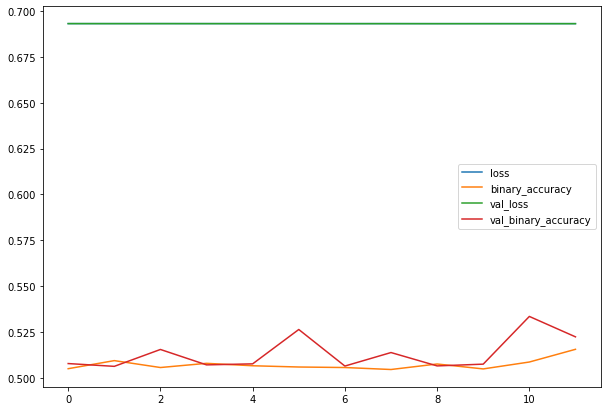

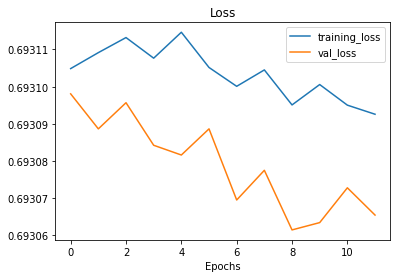

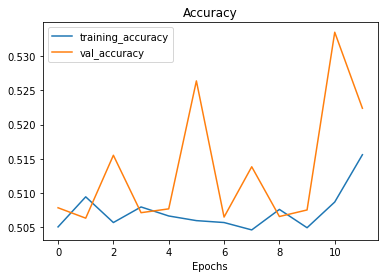

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_5)

============> 做資料視覺化、及 metric 定義 <=======================

## Model_6

In [ ]:
len(vocabulary)

88588

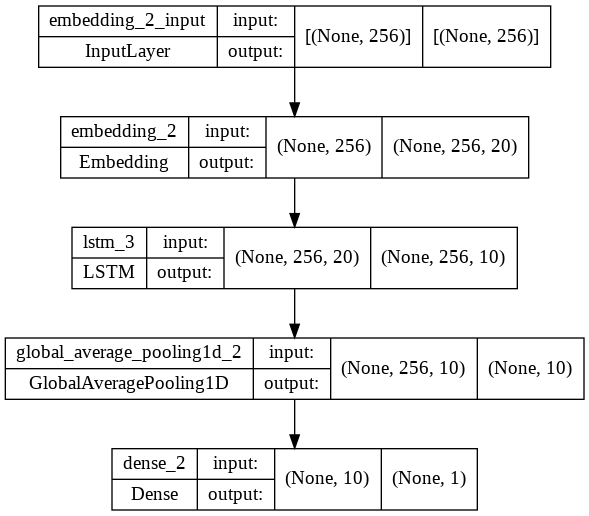

In [ ]:
# change to lstm layer
from tensorflow.keras.utils import plot_model

model_6 = tf.keras.Sequential([
  tf.keras.layers.Embedding(len(vocabulary), 20, input_length=256),
  tf.keras.layers.LSTM(10, dropout=0.5, return_sequences=True),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        metrics=["binary_accuracy"])
callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)


plot_model(model = model_6, show_shapes = True)

In [ ]:
model_6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 20)           1771760   
                                                                 
 lstm_3 (LSTM)               (None, 256, 10)           1240      
                                                                 
 global_average_pooling1d_2   (None, 10)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,773,011
Trainable params: 1,773,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_6 = model_6.fit(train_data, train_labels, epochs=20, validation_data=(valid_data, valid_labels), callbacks=[callback])

Epoch 1/20
782/782 [==============================] - 13s 14ms/step - loss: 0.5248 - binary_accuracy: 0.7368 - val_loss: 0.5008 - val_binary_accuracy: 0.7639
Epoch 2/20
782/782 [==============================] - 11s 14ms/step - loss: 0.3122 - binary_accuracy: 0.8850 - val_loss: 0.3490 - val_binary_accuracy: 0.8626
Epoch 3/20
782/782 [==============================] - 11s 14ms/step - loss: 0.2309 - binary_accuracy: 0.9191 - val_loss: 0.3289 - val_binary_accuracy: 0.8614
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.1791 - binary_accuracy: 0.9368 - val_loss: 0.3628 - val_binary_accuracy: 0.8554
Epoch 5/20
782/782 [==============================] - 13s 16ms/step - loss: 0.1527 - binary_accuracy: 0.9470 - val_loss: 0.4672 - val_binary_accuracy: 0.8384
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 0.1338 - binary_accuracy: 0.9560 - val_loss: 0.4212 - val_binary_accuracy: 0.8524


In [ ]:
loss_6, acc_6 = model_6.evaluate(test_data, test_labels)
loss_6, acc_6

391/391 [==============================] - 2s 6ms/step - loss: 0.4162 - binary_accuracy: 0.8518


(0.41617080569267273, 0.8517600297927856)

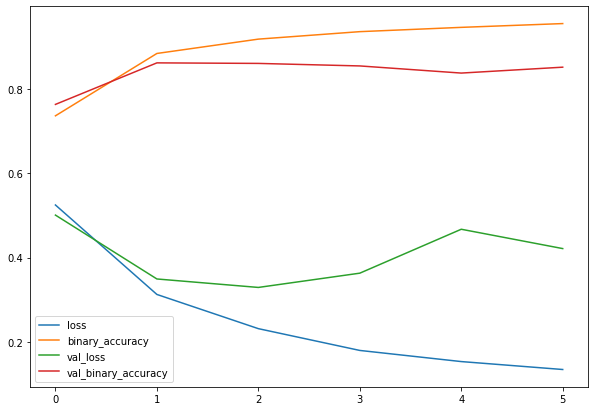

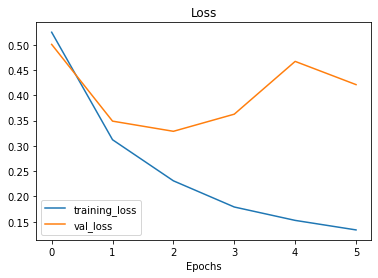

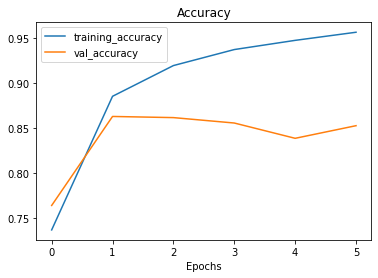

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_6)

In [ ]:
model_6.save("imdb_model_6")

INFO:tensorflow:Assets written to: imdb_model_6/assets


INFO:tensorflow:Assets written to: imdb_model_6/assets


## Model_7

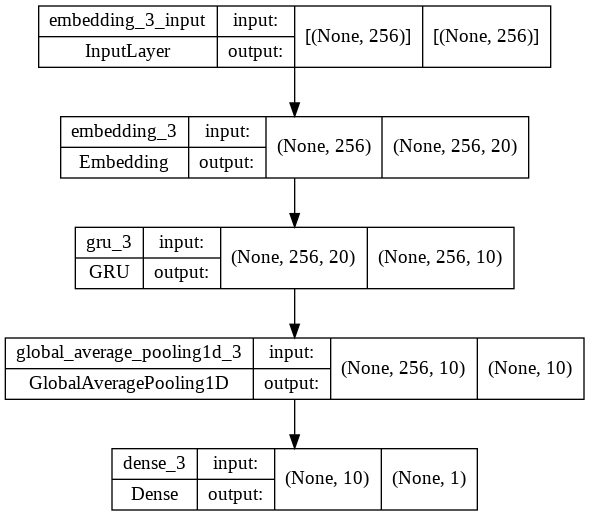

In [ ]:
# change to GRU layer
from tensorflow.keras.utils import plot_model

model_7 = tf.keras.Sequential([
  tf.keras.layers.Embedding(len(vocabulary), 20, input_length=256),
  tf.keras.layers.GRU(10, dropout=0.5, return_sequences=True),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        metrics=["binary_accuracy"])
callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)


plot_model(model = model_7, show_shapes = True)

In [ ]:
model_7.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 20)           1771760   
                                                                 
 gru_3 (GRU)                 (None, 256, 10)           960       
                                                                 
 global_average_pooling1d_3   (None, 10)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,772,731
Trainable params: 1,772,731
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_7 = model_7.fit(train_data, train_labels, epochs=20, validation_data=(valid_data, valid_labels), callbacks=[callback])

Epoch 1/20
782/782 [==============================] - 44s 48ms/step - loss: 0.4665 - binary_accuracy: 0.7712 - val_loss: 0.3796 - val_binary_accuracy: 0.8438
Epoch 2/20
782/782 [==============================] - 37s 47ms/step - loss: 0.2945 - binary_accuracy: 0.8856 - val_loss: 0.3418 - val_binary_accuracy: 0.8561
Epoch 3/20
782/782 [==============================] - 37s 47ms/step - loss: 0.2394 - binary_accuracy: 0.9094 - val_loss: 0.3396 - val_binary_accuracy: 0.8593
Epoch 4/20
782/782 [==============================] - 37s 47ms/step - loss: 0.1914 - binary_accuracy: 0.9305 - val_loss: 0.3497 - val_binary_accuracy: 0.8575
Epoch 5/20
782/782 [==============================] - 37s 47ms/step - loss: 0.1643 - binary_accuracy: 0.9424 - val_loss: 0.3797 - val_binary_accuracy: 0.8516
Epoch 6/20
782/782 [==============================] - 37s 47ms/step - loss: 0.1370 - binary_accuracy: 0.9528 - val_loss: 0.3741 - val_binary_accuracy: 0.8546


In [ ]:
loss_7, acc_7 = model_7.evaluate(test_data, test_labels)
loss_7, acc_7

391/391 [==============================] - 6s 16ms/step - loss: 0.3699 - binary_accuracy: 0.8569


(0.36985769867897034, 0.8568800091743469)

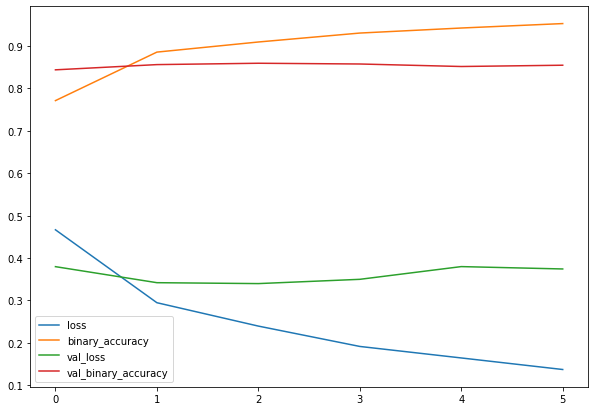

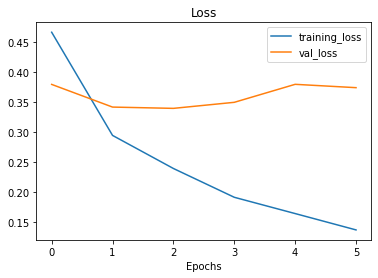

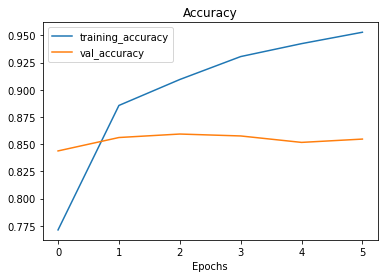

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_7)

In [ ]:
model_7.save("imdb_model_7")

INFO:tensorflow:Assets written to: imdb_model_7/assets


INFO:tensorflow:Assets written to: imdb_model_7/assets


## Model_8

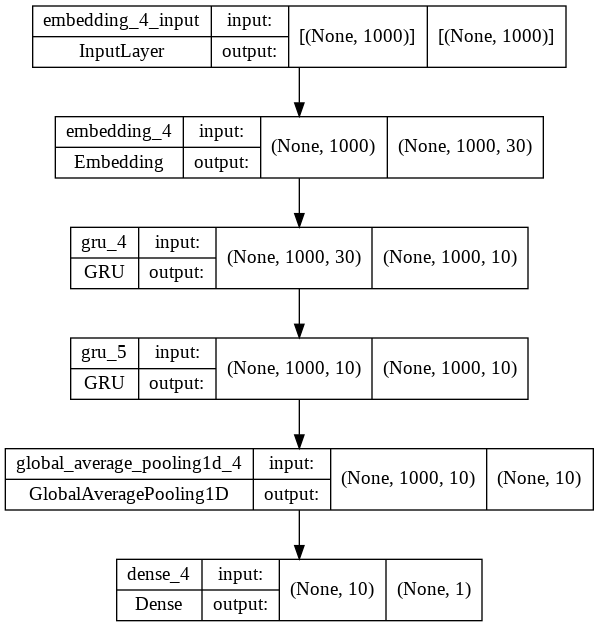

In [ ]:
# changing GRU layer to input_len=200
from tensorflow.keras.utils import plot_model

model_8 = tf.keras.Sequential([
  tf.keras.layers.Embedding(len(vocabulary), 30, input_length=1000),
  tf.keras.layers.GRU(10, dropout=0.5, return_sequences=True),
  tf.keras.layers.GRU(10, dropout=0.4, return_sequences=True),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        metrics=["binary_accuracy"])
callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)


plot_model(model = model_8, show_shapes = True)

In [ ]:
model_8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 30)          2657640   
                                                                 
 gru_4 (GRU)                 (None, 1000, 10)          1260      
                                                                 
 gru_5 (GRU)                 (None, 1000, 10)          660       
                                                                 
 global_average_pooling1d_4   (None, 10)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,659,571
Trainable params: 2,659,571
Non-trainable params: 0
____________________________________________

In [ ]:
history_8 = model_8.fit(train_data, train_labels, epochs=20, validation_data=(valid_data, valid_labels))

Epoch 1/20
782/782 [==============================] - 230s 295ms/step - loss: 0.0880 - binary_accuracy: 0.9732 - val_loss: 0.3892 - val_binary_accuracy: 0.8760
Epoch 2/20
782/782 [==============================] - 230s 294ms/step - loss: 0.0691 - binary_accuracy: 0.9787 - val_loss: 0.4736 - val_binary_accuracy: 0.8692
Epoch 3/20
782/782 [==============================] - 230s 295ms/step - loss: 0.0583 - binary_accuracy: 0.9826 - val_loss: 0.4627 - val_binary_accuracy: 0.8690
Epoch 4/20
262/782 [=========>....................] - ETA: 2:07 - loss: 0.0401 - binary_accuracy: 0.9890

In [ ]:
loss_8, acc_8 = model_8.evaluate(test_data, test_labels)
print("loss: ",loss_8, " accuracy: ", acc_8)

391/391 [==============================] - 41s 105ms/step - loss: 0.3627 - binary_accuracy: 0.8797
loss:  0.3627285659313202  accuracy:  0.8796799778938293


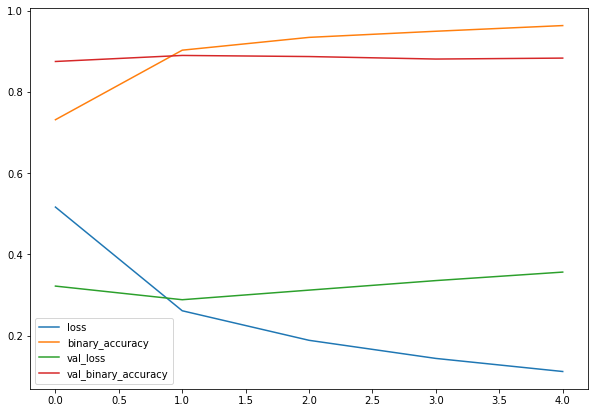

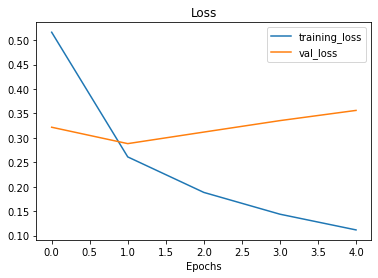

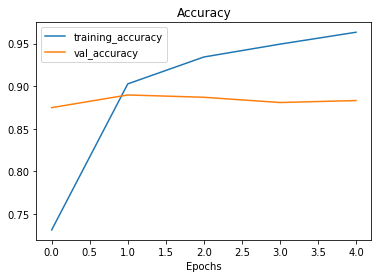

In [ ]:
import matplotlib.pyplot as plt
plot_loss_curves(history_8)

We are able to reach a classification accuracy over 85%. The training accuracy continuously increases while the training accuracy plateaus after the second epoch. This means that we [overfit](https://thedatafrog.com/overfitting-illustrated/). But in this post, that's none of our concern: we only want to understand  what is embedding. 

## Visualizing embedding

To investigate embedding, we create a function that provides the output of the embedding layer for a given input:

In [ ]:

# with a Sequential model
get_embed_out = keras.backend.function(
    [model.layers[0].input],
    [model.layers[1].output])

Then, we use this function to get the distribution of points from the embedding of the first review in the validation sample: 

In [ ]:
layer_output = get_embed_out([test_data[0]])
print(type(layer_output), len(layer_output), layer_output[0].shape)

<class 'list'> 1 (256, 2)


We see that layer_output is a list with a single element containing the array of embedded words. So let's get this array and plot it: 

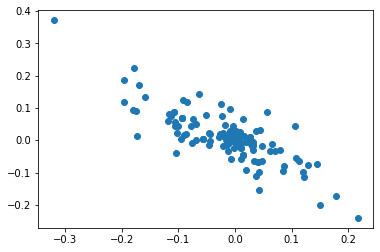

In [ ]:
words = layer_output[0]
plt.scatter(words[:,0], words[:,1])

We see that the distribution of embedded words for this review has an elongated shape. But what does it mean? 

Let's create our own review, encode it, and embed it to see what happens: 

In [ ]:
review = ['great', 'brilliant','crap','bad', 
          'fantastic', 'movie', 'seagal']
enc_review = tf.constant([vocabulary[word] for word in review])
enc_review

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([  87,  530,  595,   78,  777,   20, 3272], dtype=int32)>

In [ ]:
words = get_embed_out([enc_review])[0]

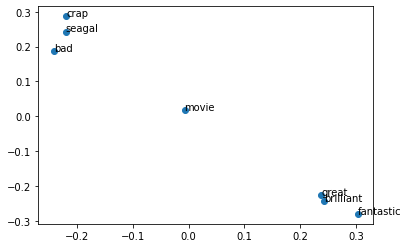

In [ ]:
plt.scatter(words[:,0], words[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (words[i,0], words[i,1]))

We see that words with a similar meaning are indeed grouped together. There is one group with "great", "brilliant", "fantastic". This area of the plane contains the words that carry a positive meaning. On the other side, we have "bad", "crap", and ... "seagal". It seems that hiring Steven Seagal for your movie guarantees bad reviews on IMDB! 

The word "movie", finally, does not carry much meaning about the quality of the review, and ends up in the middle.

**Exercise**: I found a bad actor, that's easy, especially with Steven around. Can you find a good one?  

Now let's plot the distribution of points for a few reviews with the following function: 

In [ ]:
import math
def plot_review(i):
    # plot the distribution of points
    enc_words = test_data[i]
    emb_words = get_embed_out([enc_words])[0]
    plt.figure(figsize=(8,8))
    plt.scatter(emb_words[:,0], emb_words[:,1])
    # use the label as title: 1 is positive, 
    # 0 is negative
    plt.title(test_labels[i])
    # for words that are far enough from (0,0), 
    # print the word
    for i, (enc_word, emb_word) in enumerate(zip(enc_words, emb_words)):
        word = index[enc_word]
        x, y = emb_word
        if math.sqrt(x**2 + y**2)>0.2: 
            plt.annotate(word, (x, y))
    # fix the range in x and y to be able to compare
    # the distributions of different reviews
    axes = plt.gca()
    axes.set_xlim([-0.5,0.5])
    axes.set_ylim([-0.5, 0.5])
    axes.set_aspect('equal', adjustable='box')

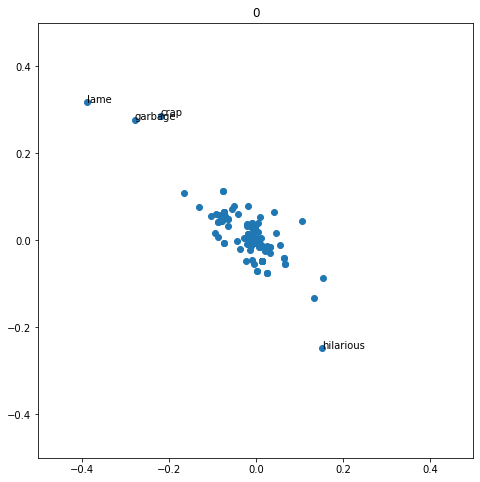

In [ ]:
plot_review(15)

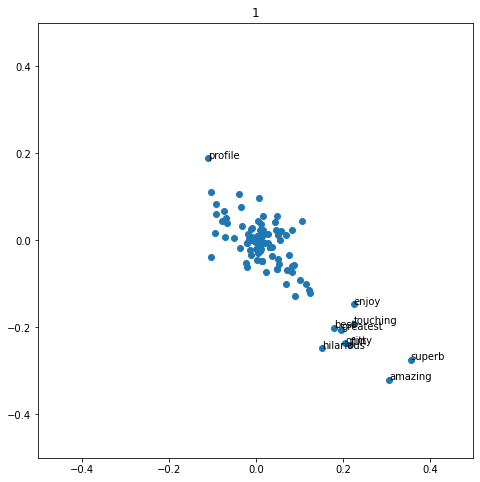

In [ ]:
plot_review(17)

You can plot a few more reviews if you wish, by changing the review index in the commands above. 

We see that positive reviews tend to have words with a meaning similar to "great", "brilliant", and "fantastic", while negative reviews tend to have words with a meaning similar to "seagal".

The goal of the dense layer in our network is to summarize the information in the whole distribution of points for each review. 

Now let's [go back](https://thedatafrog.com/word-embedding-sentiment-analysis/#wrapup) and wrap up with an interesting discussion about Steven Seagal and embedding.